In [15]:
import sys
sys.path.insert(1, 'C:/Users/arunakrishnan/Desktop/Capstone/Brands')

In [16]:
!pip install helper_functions
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install ngrams
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import helper_functions

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from transformers import pipeline
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [20]:
df = pd.read_csv('/content/PenningtonBird_brand_handlabeled_copy.csv', index_col = [0])

In [21]:
#replace NaN in label columns with 0
columns = ['Cost','Ease of use', 'Effective', 'Efficient']

for column in columns:
    df[column] = df[column].replace(np.nan, int(0))

In [22]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [23]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = [None] * len(df)
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
df['sentiment_m'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


#Zero Shot Classifier

In [24]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [25]:
# insert the labels you identified from above section
type = ['Cost', 'Efficient', 'Effective', 'Ease of use']

In [26]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [27]:
# create a "max" column for metric purposes
df['max'] = df[['Cost_m', 'Efficient_m', 'Effective_m', 'Ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,Effective,Efficient,Cost,Ease of use,Sentiment,sentiment_m,Cost_m,Efficient_m,Effective_m,Ease of use_m,max
15371,Garden,90655,Pennington Ready-to-Use Hummingbird Food 64oz,https://www.walmart.com//ip/Pennington-Ready-t...,Walmart,PenningtonBird,471014069,471014069,No,2022-04-15T00:00:00,2022,4,15,Great nectar!,I received product reimbursement in exchange f...,organic reviews,5.74,5,0,0,0,No,i received product reimbursement in exchange f...,4/15/22,43,1.0,0.0,0.0,0.0,Positive,Positive,0.409216,0.663522,0.992346,0.827375,0.992346
6496,Garden,66334,Pennington Classic Wild Bird Feed 20lb,https://www.walmart.com//ip/Pennington-Classic...,Walmart,PenningtonBird,17256227,16794608,Yes,2021-07-12T00:00:00,2021,7,28,Pennington Classic Wild Bird Feed and Seed 40 LB,"I love feeding the birds and squirrels, this i...",organic reviews,10.97,5,0,0,0,No,"i love feeding the birds and squirrels, this i...",7/12/21,16,0.0,0.0,0.0,1.0,Positive,Positive,0.300004,0.902962,0.993358,0.915822,0.993358
8354,Garden,68226,Pennington Classic Ear Corn,https://www.walmart.com//ip/Pennington-Classic...,Walmart,PenningtonBird,17163381,17163381,No,2021-09-11T00:00:00,2021,9,36,NaN,Good quality corn (for squirrel food) Good pri...,organic reviews,7.47,5,0,0,0,No,good quality corn (for squirrel food) good pri...,9/11/21,14,1.0,0.0,0.0,0.0,Positive,Positive,0.159196,0.855290,0.986661,0.653974,0.986661


#Insights

In [28]:
#df = df[0:99]

In [29]:
#assign the max to its aligned type
align_list=[]
j = 0
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      # print(i)
      # print(df[t+'_m'].iloc[i])
      align_list.append(t)

df['align_type']=align_list

In [30]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['Sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,Cost,Ease of use,Effective,Efficient,All
Sentiment,,,,,
Negative,10,0,5,1,16
Neutral,6,0,6,0,12
Positive,2,1,69,0,72
All,18,1,80,1,100


In [31]:
#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,Cost,Ease of use,Effective,Efficient
Sentiment,,,,
Negative,56%,0%,6%,100%
Neutral,33%,0%,8%,0%
Positive,11%,100%,86%,0%


In [32]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results



array([['56%', '0%', '6%', '100%'],
       ['33%', '0%', '8%', '0%'],
       ['11%', '100%', '86%', '0%']], dtype=object)

In [47]:
import seaborn as sns

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

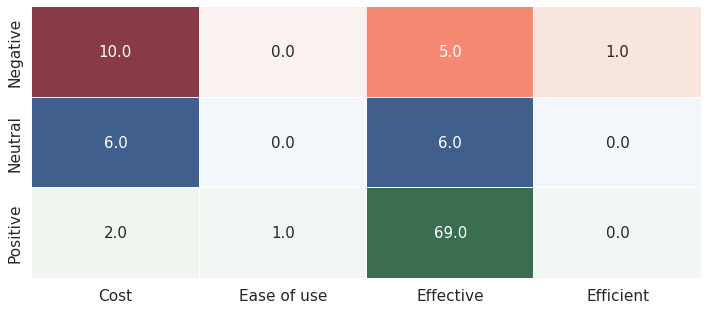

In [48]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [49]:
# Heatmap

plt.figure(figsize=(12,5))
sns.set(font_scale=1.4)


# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot = results, cmap="Greens", alpha=0.75,fmt="",linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot = results, cmap="Blues", alpha=0.75,fmt="",linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot = results, cmap="Reds", alpha=0.75,fmt="",linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

<Figure size 864x360 with 0 Axes>

ValueError: ignored

<Figure size 864x360 with 0 Axes>

In [34]:
import plotly.express as px

In [35]:
# Treemap
from collections import defaultdict
import plotly
import plotly.express as px

data =  pd.DataFrame.from_dict(df)
fig = px.treemap(data, path=['sentiment_m', 'align_type'])

fig.data[0].textinfo = 'label+text+value'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False

fig.show()

#For 5 start rating reviews

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df_5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

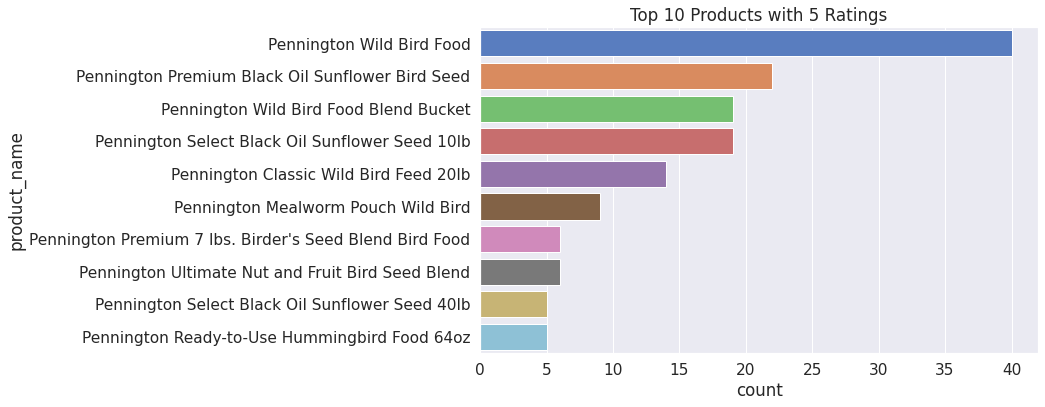

In [38]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_5, order = df_5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

#N-gram

In [39]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [51]:
from nltk import ngrams

In [53]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

NameError: ignored

In [42]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['Sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

In [43]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

<Figure size 864x360 with 0 Axes>

ValueError: ignored

<Figure size 864x360 with 0 Axes>

In [72]:
df.to_csv('evaluation_PenningtonFertilizer.csv')